In [2]:
#@title Import { display-mode: "form" }
import pandas as pd
pd.set_option('display.max_columns', 30)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import RepeatedKFold
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import spearmanr
from sklearn.ensemble import GradientBoostingRegressor
from typing import Dict
import random
import itertools
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/MyDrive/Colab Notebooks/??/imputation_test.csv"
df = pd.read_csv(path)

## EDA

In [ ]:
df.head(30)

,hh_id,year,month,zipcode,mozip,lusage,luse1,luse2,luse3,luse4,luse5,luse6,children,hhsize2,hhsize3,hhsize4,hhsize5,hhsize5plus,income2,income3,income4,income5,income6,income7,income8,income9,owner,size
0,3,2010,4,53.0,540.0,6.322805,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,1.0,0,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
1,3,2010,5,53.0,541.0,6.510683,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,1.0,0,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
2,3,2010,6,53.0,542.0,6.696693,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,1.0,0,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
3,3,2010,7,53.0,543.0,6.967286,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,1.0,0,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
4,3,2010,8,53.0,544.0,6.966908,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,1.0,0,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
5,3,2011,4,53.0,545.0,6.456377,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,1.0,0,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
6,3,2011,5,53.0,546.0,6.486542,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,1.0,0,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
7,3,2011,6,53.0,547.0,6.625392,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,1.0,0,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
8,3,2011,7,53.0,548.0,6.730977,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,1.0,0,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
9,3,2011,8,53.0,549.0,6.699666,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,1.0,0,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['hh_id'].plot(kind='hist', bins=20, title='hh_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['month'].plot(kind='hist', bins=20, title='month')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='hh_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='hh_id', y='year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='year', y='month', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='month', y='mozip', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['month']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('month')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['mozip']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('mozip')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['lusage']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('lusage')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['luse1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('luse1')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['hh_id'].plot(kind='line', figsize=(8, 4), title='hh_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['month'].plot(kind='line', figsize=(8, 4), title='month')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318240 entries, 0 to 318239
Data columns (total 28 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   hh_id        318240 non-null  int64  
 1   year         318240 non-null  int64  
 2   month        318240 non-null  int64  
 3   zipcode      316090 non-null  float64
 4   mozip        316090 non-null  float64
 5   lusage       318240 non-null  float64
 6   luse1        302820 non-null  float64
 7   luse2        308410 non-null  float64
 8   luse3        309330 non-null  float64
 9   luse4        309300 non-null  float64
 10  luse5        309300 non-null  float64
 11  luse6        309430 non-null  float64
 12  children     316090 non-null  float64
 13  hhsize2      318240 non-null  int64  
 14  hhsize3      318240 non-null  int64  
 15  hhsize4      318240 non-null  int64  
 16  hhsize5      318240 non-null  int64  
 17  hhsize5plus  318240 non-null  int64  
 18  income2      316090 non-

In [ ]:
print(df.columns)

Index(['hh_id', 'year', 'month', 'zipcode', 'mozip', 'lusage', 'luse1',
       'luse2', 'luse3', 'luse4', 'luse5', 'luse6', 'children', 'hhsize2',
       'hhsize3', 'hhsize4', 'hhsize5', 'hhsize5plus', 'income2', 'income3',
       'income4', 'income5', 'income6', 'income7', 'income8', 'income9',
       'owner', 'size'],
      dtype='object')


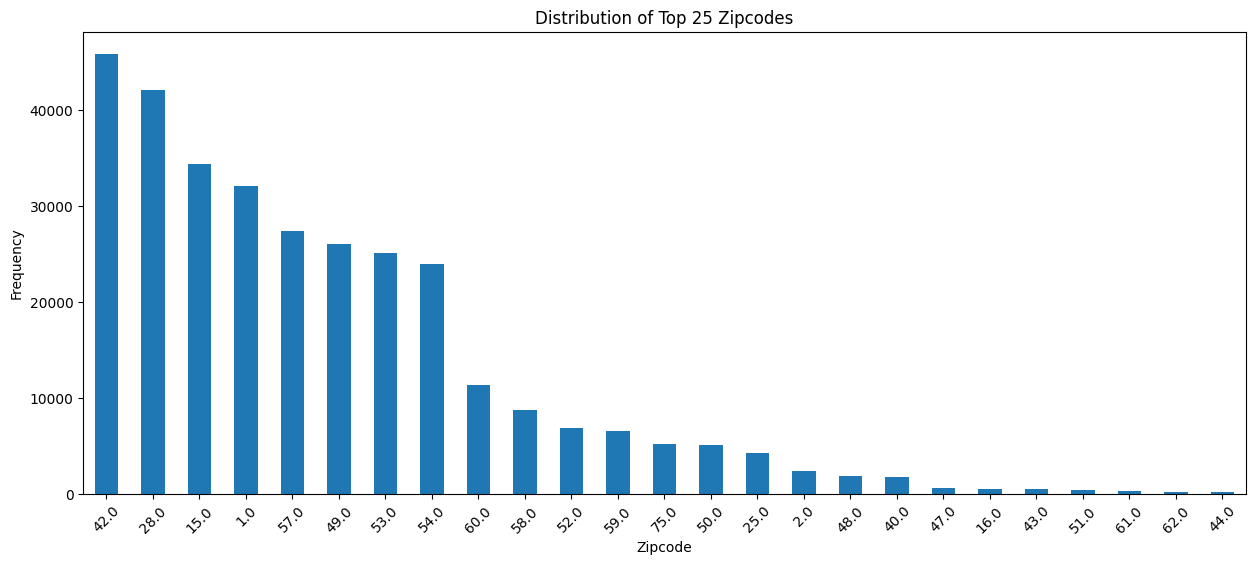

In [ ]:
# Count the occurrences of each zipcode
zipcode_counts = df['zipcode'].value_counts()

# Decide how many top zipcodes you want to display, you can adjust this number
top_n = 25

# Plot
plt.figure(figsize=(15, 6))  # Adjust the size as needed
zipcode_counts.head(top_n).plot(kind='bar')  # Plotting only the top N zipcodes
plt.title('Distribution of Top {} Zipcodes'.format(top_n))
plt.xlabel('Zipcode')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.show()


In [ ]:
zips = df["zipcode"]
# Calculate statistics
average = zips.mean()
std_dev = zips.std()
min_value = zips.min()
max_value = zips.max()
# Print statistics
print("Average:", average)
print("Standard Deviation:", std_dev)
print("Minimum:", min_value)
print("Maximum:", max_value)

Average: 38.45933120313835
Standard Deviation: 19.374453999655266
Minimum: 1.0
Maximum: 76.0


In [ ]:
def explore_col(values):
  average = values.mean()
  std_dev = values.std()
  min_value = values.min()
  max_value = values.max()
  unique_values_count = values.nunique()
  median = values.median()
  quantiles = values.quantile([0.25, 0.5, 0.75])

  # Print statistics
  print("Average:", average)
  print("Standard Deviation:", std_dev)
  print("Minimum:", min_value)
  print("Maximum:", max_value)
  print("Count of Unique Values:", unique_values_count)
  print("Median:", median)
  print("Quantiles (25%, 50%, 75%):")
  print(quantiles)
  print("\n")

sizes = df["size"]
explore_col(sizes)

Average: 7461.814813165279
Standard Deviation: 4452.755767996409
Minimum: 0.0
Maximum: 20000.0
Count of Unique Values: 12062
Median: 7209.0
Quantiles (25%, 50%, 75%):
0.25     3934.0
0.50     7209.0
0.75    10542.0
Name: size, dtype: float64




In [ ]:
for atr in df.columns:
  explore_col(df[atr])

Average: 23681.297479889392
Standard Deviation: 13668.726916028958
Minimum: 3
Maximum: 47356
Count of Unique Values: 31824
Median: 23745.5
Quantiles (25%, 50%, 75%):
0.25    11851.75
0.50    23745.50
0.75    35462.25
Name: hh_id, dtype: float64


Average: 2010.5
Standard Deviation: 0.5000007855724898
Minimum: 2010
Maximum: 2011
Count of Unique Values: 2
Median: 2010.5
Quantiles (25%, 50%, 75%):
0.25    2010.0
0.50    2010.5
0.75    2011.0
Name: year, dtype: float64


Average: 6.0
Standard Deviation: 1.414215784307634
Minimum: 4
Maximum: 8
Count of Unique Values: 5
Median: 6.0
Quantiles (25%, 50%, 75%):
0.25    5.0
0.50    6.0
0.75    7.0
Name: month, dtype: float64


Average: 38.45933120313835
Standard Deviation: 19.374453999655266
Minimum: 1.0
Maximum: 76.0
Count of Unique Values: 75
Median: 42.0
Quantiles (25%, 50%, 75%):
0.25    28.0
0.50    42.0
0.75    54.0
Name: zipcode, dtype: float64


Average: 396.7650194564839
Standard Deviation: 200.03074887895514
Minimum: 6.0
Maximum: 841.0

No outstanding outliers to be removed

## Check missing values

In [ ]:
#to add some more comments
#check missing values in other columns
null_zipcode_df = df[pd.isnull(df['zipcode'])]

# Randomly select one row from the filtered DataFrame
random_row = null_zipcode_df.sample()

# Convert the row to a list
row_values = random_row.values.tolist()

# If you want a single list (not a list of lists) since sample() returns a DataFrame
row_values = row_values[0]

# Print the list of values
print(row_values)

[39913.0, 2011.0, 4.0, nan, nan, 6.3155904, 6.5383182, 6.6689653, 6.7820163, 6.9652452, 7.1380577, 7.0242982, nan, 0.0, 0.0, 0.0, 0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [ ]:
# Check if all specified columns have NaN values in the same rows
def missing_together(columns_to_check):
  nan_rows = df[columns_to_check].isna().all(axis=1)
  if nan_rows.any():
      print(f"Number of rows where all specified columns are NaN: {nan_rows.sum()}")
      first = columns_to_check[0]
      # Check if the number of NaN rows matches the number of NaNs in a single column
      if nan_rows.sum() == df[first].isna().sum():
          print("The missing values in the specified columns occur in the same rows.")
      else:
          print("The missing values in the specified columns do not always occur in the same rows.")
  else:
      print("There are no rows where all specified columns are NaN.")

In [ ]:
cols316 = ['zipcode', 'mozip', 'children', 'income2', 'income3', 'income4', 'income5', 'income6', 'income7', 'income8', 'income9', 'owner', 'size']
missing_together(cols316)

Number of rows where all specified columns are NaN: 2150
The missing values in the specified columns occur in the same rows.


In [ ]:
cols309 = ['luse3', 'luse4', 'luse5']
missing_together(cols309)

Number of rows where all specified columns are NaN: 8810
The missing values in the specified columns do not always occur in the same rows.


## Splitting data

In [5]:
nan_mask = pd.isna(df['size'])

# Step 2: Create x_blind DataFrame
x_blind = df[nan_mask].drop(columns=['size'])

# Step 3: Create y_blind DataFrame
y_blind = df[nan_mask][['size']]

xy = df.dropna(subset=['size'])# Creating a DataFrame without the NaN 'size' rows
x = xy.drop("size", axis=1)  # Features
y = xy[["size"]]  # Target variable

## Fill Missing values

There are still missing values in the "blind" dataset in other attributes. If this dataset could have been used, then these values would have been filled with a common method like mean or KNN Imputer. In this case, data leakage was avoided as all the information used to fill these fields comes only from the "blind" dataset.

In [6]:
def fill_luse(datafr):

  # Calculating the mean of the 'luse4' and 'luse5' columns
  mean_luse4 = datafr['luse4'].mean()
  mean_luse5 = datafr['luse5'].mean()

  # Replacing NaN values in each DataFrame
  datafr['luse4'].fillna(mean_luse4, inplace=True)
  datafr['luse5'].fillna(mean_luse5, inplace=True)

In [7]:
fill_luse(x)

A rigorous addition would be to fill each dataset with its own average for the missing attributes. This way, we avoid data leakage i.e. the values from the test set contribute to the average of the whole dataset, which are then used to fill in the missing values in the testing set. This implies that information leaks from training to the testing set.

In [ ]:
# fill_luse(x_train)
# fill_luse(x_val)
# fill_luse(x_test)
# fill_luse(x_blind)

## Redundant parameters

In [8]:
x = x.drop(columns=['mozip'])
#reasoning below

In [ ]:
# x_train = x_train.drop(columns=['mozip'])
# x_test = x_test.drop(columns=['mozip'])
# x_blind = x_blind.drop(columns=['mozip'])

In [ ]:
def change_income(datafr):
  #Income column change: this method addresses the case in which there are more than one income in the house by summing the incomes, simmilarly to what happens in reality.
  income_avgs = [12000, 25000, 35000, 45000, 62500, 87500, 112500, 160000]

  # Calculate the 'income' column as the weighted sum of the income categories
  datafr['income'] = (
      datafr['income2'] * income_avgs[0] +
      datafr['income3'] * income_avgs[1] +
      datafr['income4'] * income_avgs[2] +
      datafr['income5'] * income_avgs[3] +
      datafr['income6'] * income_avgs[4] +
      datafr['income7'] * income_avgs[5] +
      datafr['income8'] * income_avgs[6] +
      datafr['income9'] * income_avgs[7]
  )

  # Drop the original income columns
  datafr.drop(['income2', 'income3', 'income4', 'income5', 'income6', 'income7', 'income8', 'income9'], axis=1, inplace=True)

In [ ]:
change_income(x)

The aim was to reduce the number of attributes and the variance of the model. However, the performace was not improved by this change.

In [ ]:
# change_income(x_train)
# change_income(x_test)
# change_income(x_val)
# change_income(x_blind)

In [ ]:
# x_train = x_train.drop(columns=['mozip'])
# x_test = x_test.drop(columns=['mozip'])
# x_val = x_val.drop(columns=['mozip'])
# x_blind = x_blind.drop(columns=['mozip'])

In [ ]:
# change_income(x_train)
# change_income(x_test)
# change_income(x_blind)

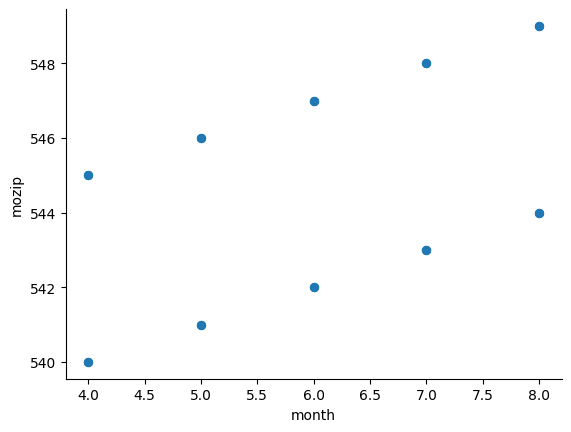

In [ ]:
_df_7.plot(kind='scatter', x='month', y='mozip', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


'mozip' attribute is redundant as it only combines information from the month and zipcode columns. This linear correlation between the variables can be seen in the plot above.

In [ ]:
print(df["zipcode"].nunique())
print(df["mozip"].nunique())

75
750


In [ ]:
#Checking if the income columns are a one-hot encoding of the income
#The aum is to further merge these columns into one in the feature engineering part
income_columns = ['income2', 'income3', 'income4', 'income5', 'income6', 'income7', 'income8', 'income9']

# Create a new DataFrame with only the dropped columns
dropped_columns_df = df[income_columns].copy()
dropped_columns_df.head(30)

In [ ]:
one_hot_columns = ['income2', 'income3', 'income4', 'income5', 'income6', 'income7', 'income8', 'income9']

# Check 1: Each row has exactly one column with a value of 1
rows_with_single_one = df[one_hot_columns].sum(axis=1) == 1
if rows_with_single_one.all():
    print("All rows have exactly one category marked with 1.")
else:
    print("Some rows do not have exactly one category marked with 1.")

# Check 2: No column is entirely 0
columns_with_nonzero = df[one_hot_columns].sum(axis=0) > 0
if columns_with_nonzero.all():
    print("All columns have at least one entry marked with 1.")
else:
    print("Some columns do not have any entries marked with 1.")

Some rows do not have exactly one category marked with 1.
All columns have at least one entry marked with 1.


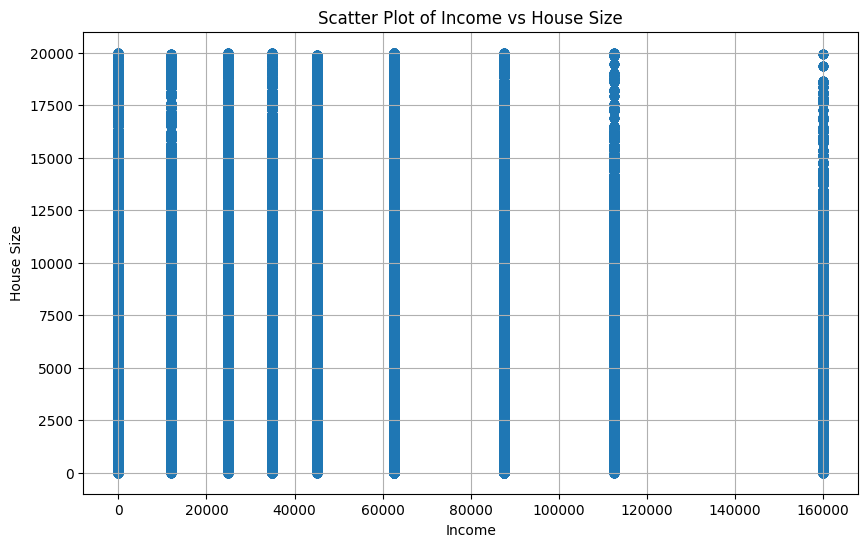

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['income'], df['size'])
plt.title('Scatter Plot of Income vs House Size')
plt.xlabel('Income')
plt.ylabel('House Size')
plt.grid(True)
plt.show()

In [ ]:
correlation, p_value = spearmanr(np.array(x['income']), np.array(y['size']))

print(f"Spearman's rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman's rank correlation coefficient: -0.08765428998745824
P-value: 1.3449348505425312e-265


The income variable has some predictive power. We might try adding it.

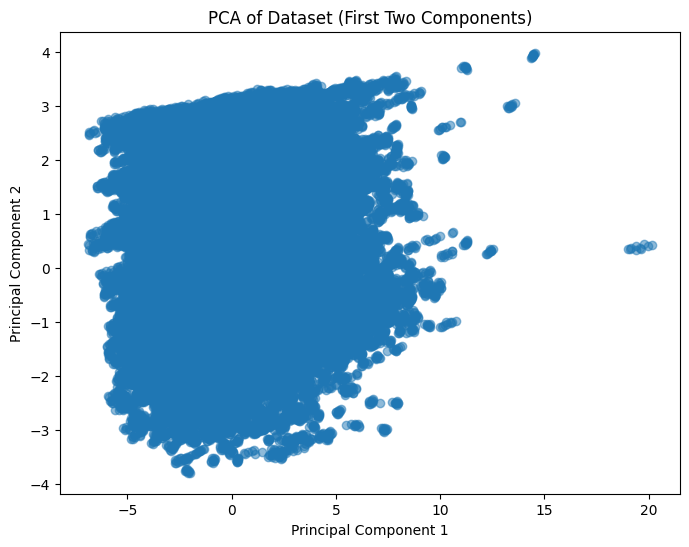

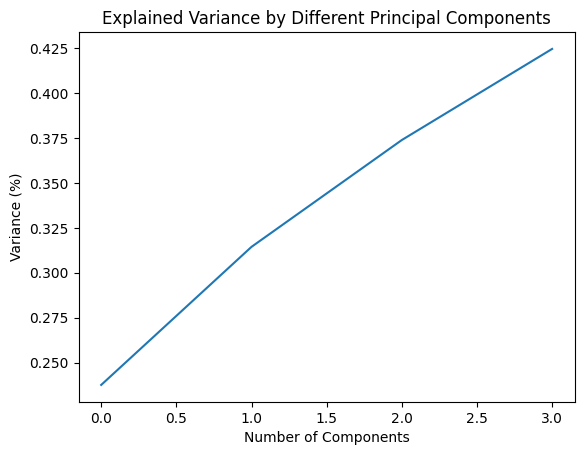

In [ ]:
# Selecting only numeric features for PCA
numeric_features = xy.select_dtypes(include=[np.number]).columns

# Standardizing the features
X_scaled = StandardScaler().fit_transform(x)

# Applying PCA
pca = PCA(n_components=4)
principal_components = pca.fit_transform(X_scaled)

# Create a new DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Plotting the first two principal components
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset (First Two Components)')
plt.show()

# Plotting Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')  # for each component
plt.title('Explained Variance by Different Principal Components')
plt.show()

## Model Selection

**RMSE** is in the same units as the dependent variable, which can make it more interpretable, especially when communicating with non-technical stakeholders.


The **Adjusted R**-squared provides an indication of how well the independent variables explain the variability of the dependent variable.

Explanation of Variance: R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R-squared value indicates that a larger portion of the variance in the dependent variable is explained by the model. Therefore, an R-squared value close to 1 suggests that the model explains most of the variance, which is typically desirable.

Adjustment for Number of Predictors: Unlike regular R-squared, Adjusted R-squared adjusts for the number of predictors in the model. This is crucial because adding more predictors to a model can artificially inflate the R-squared value, even if the new predictors have little explanatory power. Adjusted R-squared penalizes the model for unnecessary predictors, providing a more accurate measure of the model's explanatory power. A high Adjusted R-squared value indicates that the model's explanatory power is not just due to having a large number of predictors.

Overfitting Avoidance: A model with an Adjusted R-squared value closer to 1 is less likely to be overfitting the data. Overfitting occurs when a model is too complex and captures the noise in the data rather than the underlying pattern. By penalizing the addition of non-informative predictors, Adjusted R-squared helps in building models that generalize better to new data.



In [18]:
def evaluate_predictions(X, true_labels, pred):
  # Calculate RMSE
  rmse = np.sqrt(mean_squared_error(true_labels, pred))

  # Calculate MAE
  mae = mean_absolute_error(true_labels, pred)

  #Calculate Mean absolute Percentage Error
  mape = mean_absolute_percentage_error(true_labels, pred)


  # Calculate Adjusted R-squared
  r_squared = r2_score(true_labels, pred)
  n = len(true_labels)  # Number of observations
  p = X.shape[1]  # Number of predictor variables
  adj_rs = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

  return rmse, mae, mape, adj_rs

In [ ]:
#WITHOUT VALID SET -> used for initial model selection
train_size = 0.8
test_size = 0.2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

Initial XGBoost - best option so far

In [ ]:
# Initialize the XGBoost regressor model
model = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8, objective='reg:squarederror')
# Fit the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_hat = model.predict(x_test)
print(evaluate_predictions(x_train, y_test, y_hat))

(120.43671960649432, 91.24731837368402, 106923178267306.22, 0.9992678386902794)


KNN Regressor - a good alternative

In [ ]:
# Initialize the KNN Regressor
model = KNeighborsRegressor(n_neighbors=5)  # n_neighbors is the number of neighbors to consider

# Fit the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_hat = model.predict(x_test)
print(evaluate_predictions(x_train, y_test, y_hat))

(495.1760552192472, 108.42360931724048, 0.4301123522523303, 0.9876232046209896)


Gradient boosting from sklearn - would have been ideal to use, as it has the quantile prediction option built-in. Unfortunately, its performance is weak.

In [ ]:
model = GradientBoostingRegressor()

# Train the model
model.fit(x_train, y_train)

# Make predictions
predictions = model.predict(x_test)
print(evaluate_predictions(x_train, y_test, y_hat))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(495.1760552192472, 108.42360931724048, 0.4301123522523303, 0.9876232046209896)


Linear SVR

In [ ]:
# Create a LinearSVR model
model = LinearSVR(max_iter=5000)

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_hat = model.predict(x_test)
print(evaluate_predictions(x_train, y_test, y_hat))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(6032.450527164373, 4804.552590706372, 1.1535333618141558e+16, -0.8368617779157517)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Random Forrest

In [ ]:
# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=200, max_depth=7)
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
print(evaluate_predictions(x_train, y_test, y_hat))

<ipython-input-19-b9e17be19567>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


(2311.907479383774, 1759.4792729211745, 9684416171711082.0, 0.7302075205026011)


Linear Regression

In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)  # Fit the model on the training data
y_hat = model.predict(x_test)  # Make predictions on the test data
print(evaluate_predictions(x_train, y_test, y_hat))

(3318.9400526397194, 2265.1798154617863, 6276216779465712.0, 0.44398340243444945)


ElasticNet

In [ ]:
# Initialize the Elastic Net model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # l1_ratio is the mix of L1/L2 regularization
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
print(evaluate_predictions(x_train, y_test, y_hat))

(4118.117801309351, 3363.208018538928, 2.0782838817457572e+16, 0.14072152779556468)


In [ ]:
count_zeros = np.count_nonzero(y_test == 0)

print("Number of zeros in the array:", count_zeros)

Number of zeros in the array: 38


MAPE can be extremely high or undefined for data points where actual values are zero or close to zero. Might be removed from this experiment.

## Quantile boosting as in [link](https://xgboost.readthedocs.io/en/stable/python/examples/quantile_regression.html#sphx-glr-python-examples-quantile-regression-py)

In [ ]:
#VALIDATION SET -> used for hyperparameter tuning
train_size = 0.7
val_size = 0.15
test_size = 0.15

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_size / (train_size + val_size))

In [ ]:
Xy = xgb.QuantileDMatrix(x, y)
Xy_test = xgb.QuantileDMatrix(x_test, y_test, ref=Xy)

In [ ]:
alpha = np.array([0.05, 0.5, 0.95])
evals_result: Dict[str, Dict] = {}
booster = xgb.train({"objective": "reg:quantileerror","tree_method": "hist","quantile_alpha": alpha,"learning_rate": 0.1,"max_depth": 7,},
        Xy,
        num_boost_round=200,
        early_stopping_rounds=2,
        evals=[(Xy, "Train"), (Xy_test, "Test")],
        evals_result=evals_result,
    )

In [ ]:
scores = booster.inplace_predict(x_val)

y_lower = scores[:, 0]  # alpha=0.05
y_med = scores[:, 1]  # alpha=0.5, median
y_upper = scores[:, 2]  # alpha=0.95

In [ ]:
print(evaluate_predictions(x_train, y_val, y_med))

(621.5129269469988, 386.67990157874635, 1611129109410121.2, 0.9806096408936114)


We take rmse as the main performance metric. The predictions for the 0.5 quantiles are centred in the normal distribution of the values. Thus the model assumes that the true label has an equal chance of being lower or higher than the prediction. We look for the model which has the distribution centre closest to the target. The lower and upper bounds predicted by this model offer a 90% confidence that each value is within the interval.

Hyperparameter tuning for Quantile Regressor with Random Search

Due to the lack of time, I only implemented this part, without running it. The aim was to train the model with the training set and test during the tuning phase on the validation set. The expected performance assumed with the experiments in this project is obtained on newly seen data, the test set, with the best set of hyperparameters according to the validation data. We assume that we will find a similar performance on the "blind" dataset, which cannot be tested due to missing true labels.

Initially, the upper limit for the number of iterations was 340 and the maximum depth available was 9. The model with the best performance (rmse) was trained using the upper ends of the intervals. Thus, I expanded the intervals to check if there is a higher performance possible to achieve.

In [9]:
# Define the ranges for each hyperparameter
lr_range = [round(i,2) for i in list(np.arange(0.1, 0.32, 0.02))]  # Learning rate from 0.1 to 0.32 with step 0.02
rounds_range = list(range(140, 460, 40))  # Number of rounds from 60 to 340 with step 40
max_depth_range = [7, 8, 9, 10, 11, 13]  # Example maximum depths

# Create the grid containing all combinations
grid = list(itertools.product(lr_range, rounds_range, max_depth_range))

# Function to generate a random combination of hyperparameters
def get_config(grid):
    return random.choice(grid)

# Example usage
random_hyperparameters = get_config(grid)
print("Randomly selected hyperparameters:", random_hyperparameters)

Randomly selected hyperparameters: (0.28, 140, 9)


In [11]:
train_size = 0.7
val_size = 0.15
test_size = 0.15

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_size / (train_size + val_size))

In [12]:
max_iter = 200
best_rmse = 1000
mae_of_best = 1000
best_config = ()

alpha = np.array([0.05, 0.5, 0.95])
evals_result: Dict[str, Dict] = {}
checked_configs = []

for iter in range(max_iter):
  print("Starting iteration {}".format(iter))
  cr_config = get_config(grid)
  if cr_config not in checked_configs:
    checked_configs.append(cr_config)
  else:
    continue
  lr, rounds, max_depth = cr_config

  Xy = xgb.QuantileDMatrix(x, y)
  Xy_val = xgb.QuantileDMatrix(x_val, y_val, ref=Xy)

  booster = xgb.train({"objective": "reg:quantileerror","tree_method": "hist","quantile_alpha": alpha,"learning_rate": lr,"max_depth": max_depth,},
          Xy,
          num_boost_round=rounds,
          early_stopping_rounds=2,
          evals=[(Xy, "Train"), (Xy_val, "Validation")],
          evals_result=evals_result,
      )

  scores = booster.inplace_predict(x_val)
  y_lower = scores[:, 0]  # alpha=0.05
  y_med = scores[:, 1]  # alpha=0.5, median
  y_upper = scores[:, 2]  # alpha=0.95

  #we select the best configuration throughout the iterations
  rmse, mae, mape, adj_rs = evaluate_predictions(x_val, y_val, y_med) #x_val is passed to compute the size
  if rmse < best_rmse:
    best_config = lr, rounds, max_depth
    best_rmse = rmse
    mae_of_best = mae

Streaming output truncated to the last 5000 lines.
[186]	Train-quantile:52.71482	Validation-quantile:54.42497
[187]	Train-quantile:52.56314	Validation-quantile:54.29372
[188]	Train-quantile:52.45607	Validation-quantile:54.20181
[189]	Train-quantile:52.38067	Validation-quantile:54.11163
[190]	Train-quantile:52.24415	Validation-quantile:53.93394
[191]	Train-quantile:52.13276	Validation-quantile:53.86337
[192]	Train-quantile:52.02751	Validation-quantile:53.76323
[193]	Train-quantile:51.94231	Validation-quantile:53.66300
[194]	Train-quantile:51.81737	Validation-quantile:53.54594
[195]	Train-quantile:51.66261	Validation-quantile:53.38874
[196]	Train-quantile:51.53238	Validation-quantile:53.28078
[197]	Train-quantile:51.35813	Validation-quantile:53.18386
[198]	Train-quantile:51.26470	Validation-quantile:53.05033
[199]	Train-quantile:51.22654	Validation-quantile:53.00194
[200]	Train-quantile:51.14842	Validation-quantile:52.90908
[201]	Train-quantile:51.04802	Validation-quantile:52.82118
[202]

In [13]:
print(best_rmse)
print(mae_of_best)
print(best_config)

117.56452681438839
39.723218234443145
(0.28, 420, 13)


In [19]:
#retrain the model with the best configuration on the validation set and get its performance on the test set

lr, rounds, max_depth = best_config
Xy = xgb.QuantileDMatrix(x, y)
Xy_val = xgb.QuantileDMatrix(x_val, y_val, ref=Xy)  # TRAIN ON VALIDATION

booster = xgb.train({"objective": "reg:quantileerror","tree_method": "hist","quantile_alpha": alpha,"learning_rate": lr,"max_depth": max_depth,},
          Xy,
          num_boost_round=rounds,
          early_stopping_rounds=2,
          evals=[(Xy, "Train"), (Xy_val, "Validation")],
          evals_result=evals_result,
      )

scores = booster.inplace_predict(x_test) #TESTING ON TEST SET

y_lower = scores[:, 0]  # alpha=0.05
y_med = scores[:, 1]  # alpha=0.5, median
y_upper = scores[:, 2]  # alpha=0.95
print(evaluate_predictions(x_test, y_test, y_med))#x_test is passed to compute size

[0]	Train-quantile:1124.47857	Validation-quantile:1139.72102
[1]	Train-quantile:726.96876	Validation-quantile:740.23010
[2]	Train-quantile:500.54070	Validation-quantile:511.21710
[3]	Train-quantile:367.07200	Validation-quantile:374.57131
[4]	Train-quantile:282.83819	Validation-quantile:288.20691
[5]	Train-quantile:228.36027	Validation-quantile:231.73729
[6]	Train-quantile:193.39624	Validation-quantile:195.70191
[7]	Train-quantile:169.06974	Validation-quantile:170.53220
[8]	Train-quantile:151.15298	Validation-quantile:152.55686
[9]	Train-quantile:137.70727	Validation-quantile:138.83739
[10]	Train-quantile:129.44291	Validation-quantile:130.32663
[11]	Train-quantile:121.46325	Validation-quantile:122.34197
[12]	Train-quantile:115.88312	Validation-quantile:116.50673
[13]	Train-quantile:111.25027	Validation-quantile:111.87333
[14]	Train-quantile:107.67653	Validation-quantile:108.33923
[15]	Train-quantile:103.76555	Validation-quantile:104.49172
[16]	Train-quantile:101.85757	Validation-quantil

We get very similar results on the test set compared to the validation set. Thus, we can assume that the model is not overtrained and can generalize.

## Repeated K-fold Cross Validation

Cross-validation offers a better usage of the data, especially when it is limited. In our context, the high number of attributes contributed to this decision. All parts of the data are used for both training and testing. This makes the model generalize better and also offers us a better overview of its performance. Moreover, I added the repetition method to determine experimentally the performance of the best model found, as this procedure is more statistically significant.

This part was implemented before finding the Quantile Boosting method from the xgb package. The plan was to hyper tune the XGBRegressor tested in the Model Selection part. Then, I would have made repeated predictions with the best set of hyperparameters in a bootstrapping manner. Given a large set of predictions for each entry in the test set, the confidence intervals would have been computed according to the distribution.

In [ ]:
n_splits = 10
n_repeats = 3
rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats)

# Lists to store overall metrics
overall_rmse, overall_mae, overall_mape, overall_adj_rs = [], [], [], []

# Variables to keep track of the current repetition and fold
current_repeat = 1
current_fold = 0

for train_index, test_index in rkf.split(x):
    # Split data
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    break

    # Train model
    model = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8, objective='reg:squarederror')
    model.fit(x_train, y_train)

    # Predict and evaluate
    y_hat = model.predict(x_test)
    rmse, mae, mape, adj_rs = evaluate_predictions(x_train, y_test, y_hat)

    # Append metrics to overall lists
    overall_rmse.append(rmse)
    overall_mae.append(mae)
    overall_mape.append(mape)
    overall_adj_rs.append(adj_rs)

    # Increment fold counter
    current_fold += 1

    # Check if a repetition is completed
    if current_fold % n_splits == 0:
        # Calculate average performance for this repetition
        avg_rmse = np.mean(overall_rmse[-n_splits:])
        avg_mae = np.mean(overall_mae[-n_splits:])
        avg_mape = np.mean(overall_mape[-n_splits:])
        avg_adj_rs = np.mean(overall_adj_rs[-n_splits:])

        print(f"Average performance for repetition {current_repeat}:")
        print(f"RMSE: {avg_rmse}, MAE: {avg_mae}, MAPE: {avg_mape}, Adj R2: {avg_adj_rs}")

        # Increment repetition counter
        current_repeat += 1